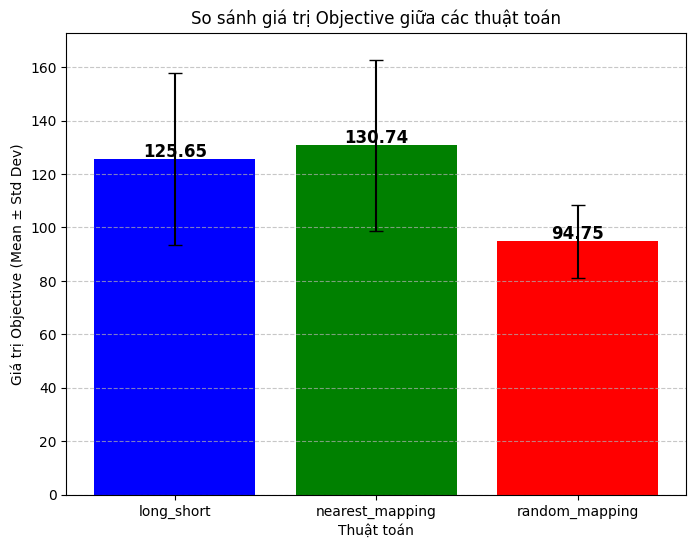

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa đường dẫn thư mục
base_path = r".\result\standardize\gamma_0"
algorithms = ["long_short", "nearest_mapping", "random_mapping"]

# Lưu kết quả thống kê
means = []
std_devs = []

# Đọc dữ liệu từ các file objective.txt
for algo in algorithms:
    file_path = os.path.join(base_path, algo, "objective.txt")
    
    if os.path.exists(file_path):
        # Đọc dữ liệu từ file
        with open(file_path, "r") as f:
            data = [float(line.strip()) for line in f.readlines()]
        
        # Tính trung bình và độ lệch chuẩn
        mean_value = np.mean(data)
        std_dev = np.std(data)

        # Lưu giá trị vào danh sách
        means.append(mean_value)
        std_devs.append(std_dev)
    else:
        print(f"⚠️ Không tìm thấy file: {file_path}")
        means.append(0)
        std_devs.append(0)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(algorithms, means, yerr=std_devs, capsize=5, color=['blue', 'green', 'red'])

# Gán nhãn
plt.xlabel("Thuật toán")
plt.ylabel("Giá trị Objective (Mean ± Std Dev)")
plt.title("So sánh giá trị Objective giữa các thuật toán")
plt.ylim(0, max(means) + max(std_devs) + 10)  # Điều chỉnh trục Y cho dễ nhìn
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên cột
for i, v in enumerate(means):
    plt.text(i, v + 1, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

# Hiển thị biểu đồ
plt.show()


📄 Biểu đồ đã được lưu thành objective_value_plot.pdf


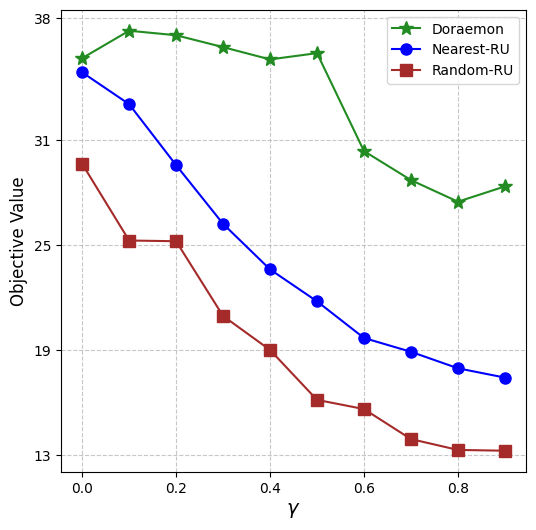

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory containing gamma_* folders
base_path = r".\result\24-02-2025_11-49-21"
gamma_values = [0] + [round(0.1 * i, 1) for i in range(1, 10)]  # Ensure gamma_0 is included
algorithms = ["Doraemon", "Nearest_RU", "Random_RU"]

# Store mean values for each algorithm
results = {algo: [] for algo in algorithms}

# Read data from gamma_* folders
for gamma in gamma_values:
    folder_name = f"gamma_{gamma}"  # Example: gamma_0, gamma_0.1, ..., gamma_0.9
    folder_path = os.path.join(base_path, folder_name)

    for algo in algorithms:
        file_path = os.path.join(folder_path, algo, "objective.txt")

        if os.path.exists(file_path):
            with open(file_path, "r") as f:
                data = [float(line.strip()) for line in f.readlines() if line.strip()]  # ✅ Skip empty lines
            mean_value = np.mean(data) if data else None  # Handle empty files
        else:
            print(f"⚠️ File not found: {file_path}")
            mean_value = None  # Assign None if the file is missing

        results[algo].append(mean_value)

# Define markers and colors for the reference image style
plot_styles = {
    "Doraemon": {"marker": "*", "color": "forestgreen", "label": "Doraemon", "size": 10},  # Star marker
    "Nearest_RU": {"marker": "o", "color": "blue", "label": "Nearest-RU", "size": 8},  # Circle marker
    "Random_RU": {"marker": "s", "color": "brown", "label": "Random-RU", "size": 8},  # Square marker
}

# Create the plot
plt.figure(figsize=(6, 6))

for algo in algorithms:
    if any(results[algo]):  # Ensure there's valid data
        plt.plot(gamma_values, results[algo], 
                 marker=plot_styles[algo]["marker"], linestyle="-",
                 color=plot_styles[algo]["color"], markersize=plot_styles[algo]["size"], 
                 label=plot_styles[algo]["label"])

# Labels and title
plt.xlabel(r"$\gamma$", fontsize=14)  # Ký hiệu γ
plt.ylabel("Objective Value", fontsize=12)

# Customize y-axis to show a few representative values
y_min = int(np.floor(min(filter(None, sum(results.values(), [])))))  # Min rounded down
y_max = int(np.ceil(max(filter(None, sum(results.values(), [])))))  # Max rounded up
num_ticks = 5  # Số nhãn muốn hiển thị
y_ticks = np.linspace(y_min, y_max, num_ticks).astype(int)  # Chỉ lấy số nguyên
plt.yticks(y_ticks)

# Grid and legend
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=10)

# Save the plot as a PDF file
output_path = "objective_value_plot.pdf"
plt.savefig(output_path, format="pdf", bbox_inches="tight")
print(f"📄 Biểu đồ đã được lưu thành {output_path}")

# Show the plot
plt.show()


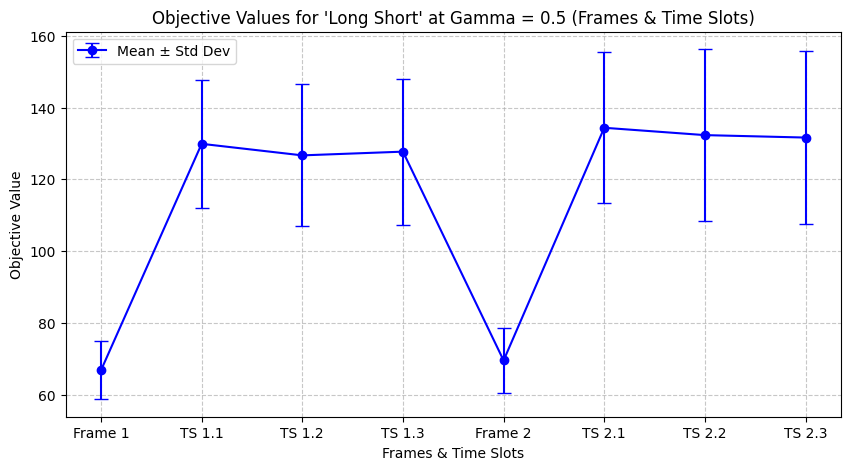

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_long_short_frame_timeslot(base_path):
    """
    Reads objective values of the 'long_short' algorithm at gamma = 0.5,
    computes grouped means and standard deviations for:
    - Frame 1 (Index 1) & Frame 2 (Index 5)
    - Time Slots 1, 2, 3 within each frame (Indices 2,3,4 and 6,7,8)
    
    Keeps the correct positions of frames and time slots on the x-axis.

    Parameters:
        base_path (str): The root directory containing gamma_* folders.
    """
    gamma_folder = "gamma_0.5"  # Folder for gamma = 0.5
    file_path = os.path.join(base_path, gamma_folder, "long_short", "objective.txt")

    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {file_path}")
        return

    # Read data
    with open(file_path, "r") as f:
        values = [float(line.strip()) for line in f.readlines()]

    values = np.array(values)  # Convert to NumPy array

    # Indices for Frames and Time Slots (1-based indexing)
    positions = [0, 1, 2, 3, 4, 5, 6, 7]  # Order: Frame 1, TS1, TS2, TS3, Frame 2, TS1, TS2, TS3

    # Compute means and standard deviations for each position
    means = [np.mean(values[i::8]) for i in positions]
    stds = [np.std(values[i::8]) for i in positions]

    # Labels for x-axis
    x_labels = ["Frame 1", "TS 1.1", "TS 1.2", "TS 1.3", "Frame 2", "TS 2.1", "TS 2.2", "TS 2.3"]
    x_positions = range(1, len(x_labels) + 1)  # X-axis positions

    # Plot
    plt.figure(figsize=(10, 5))
    plt.errorbar(x_positions, means, yerr=stds, fmt='o-', color='b', capsize=5, label="Mean ± Std Dev")

    # Labels and title
    plt.xlabel("Frames & Time Slots")
    plt.ylabel("Objective Value")
    plt.title("Objective Values for 'Long Short' at Gamma = 0.5 (Frames & Time Slots)")
    plt.xticks(x_positions, x_labels)  # Ensure correct label positioning
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
base_path = r".\result\standardize"
plot_long_short_frame_timeslot(base_path)


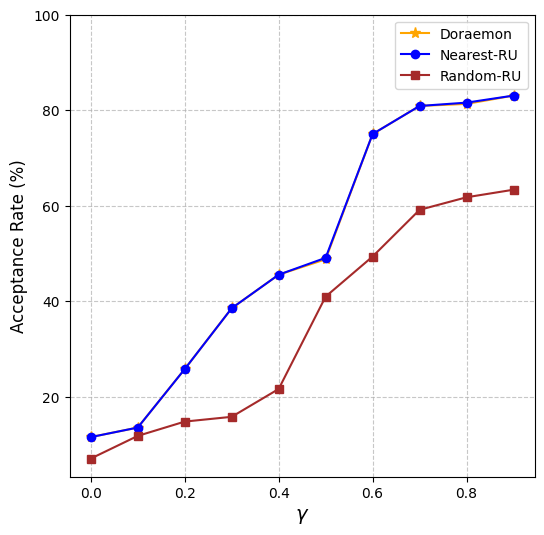

✅ Biểu đồ đã được lưu thành file PDF: acceptance_rate_plot.pdf


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory containing gamma_* folders
base_path = r".\result\24-02-2025_11-49-21"
gamma_values = [0] + [round(0.1 * i, 1) for i in range(1, 10)]  # Ensure gamma_0 is included
algorithms = ["Doraemon", "Nearest_RU", "Random_RU"]

# Store mean acceptance rates for each algorithm
acceptance_rates = {algo: [] for algo in algorithms}

# Read data from gamma_* folders
for gamma in gamma_values:
    folder_name = f"gamma_{gamma}"  # Example: gamma_0, gamma_0.1, ..., gamma_0.9
    folder_path = os.path.join(base_path, folder_name)

    for algo in algorithms:
        file_path = os.path.join(folder_path, algo, "pi_sk.txt")

        if os.path.exists(file_path):
            with open(file_path, "r") as f:
                data = [float(line.strip()) for line in f.readlines() if line.strip()]  # ✅ Skip empty lines
            mean_value = (np.mean(data) / 20) * 100 if data else None  # Compute mean, divide by 20, and convert to percentage
        else:
            print(f"⚠️ File not found: {file_path}")
            mean_value = None  # Assign None if the file is missing

        acceptance_rates[algo].append(mean_value)

# Define markers and colors for the reference image style
plot_styles = {
    "Doraemon": {"marker": "*", "color": "orange", "label": "Doraemon", "size": 8},  # Star marker
    "Nearest_RU": {"marker": "o", "color": "blue", "label": "Nearest-RU", "size": 6},  # Circle marker
    "Random_RU": {"marker": "s", "color": "brown", "label": "Random-RU", "size": 6},  # Square marker
}

# Create the plot
plt.figure(figsize=(6, 6))

for algo in algorithms:
    if any(acceptance_rates[algo]):  # Ensure there's valid data
        plt.plot(gamma_values, acceptance_rates[algo], 
                 marker=plot_styles[algo]["marker"], linestyle="-",
                 color=plot_styles[algo]["color"], markersize=plot_styles[algo]["size"], 
                 label=plot_styles[algo]["label"])

# Labels and title
plt.xlabel(r"$\gamma$", fontsize=14)  # Ký hiệu γ
plt.ylabel("Acceptance Rate (%)", fontsize=12)  # Thêm dấu % để rõ ràng

# Customize y-axis to show only [20, 40, 60, 80, 100]
plt.yticks([20, 40, 60, 80, 100])

# Grid and legend
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=10)

# Save the figure as a PDF
pdf_filename = "acceptance_rate_plot.pdf"
plt.savefig(pdf_filename, format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

print(f"✅ Biểu đồ đã được lưu thành file PDF: {pdf_filename}")




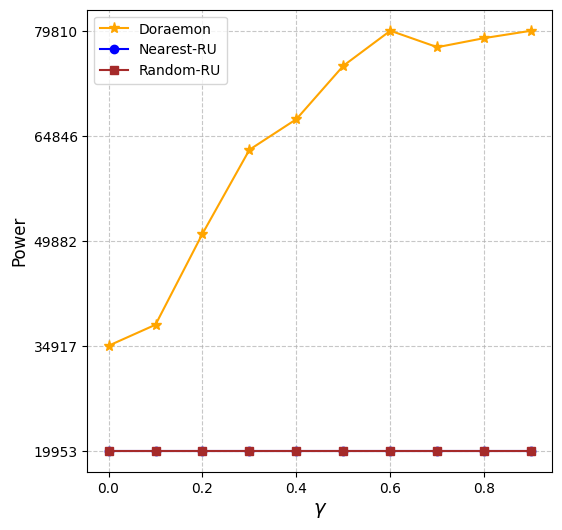

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory containing gamma_* folders
base_path = r".\result\24-02-2025_11-49-21"
gamma_values = [0] + [round(0.1 * i, 1) for i in range(1, 10)]  # Ensure gamma_0 is included
algorithms = ["Doraemon", "Nearest_RU", "Random_RU"]

# Store mean acceptance rates for each algorithm
acceptance_rates = {algo: [] for algo in algorithms}

# Read data from gamma_* folders
for gamma in gamma_values:
    folder_name = f"gamma_{gamma}"  # Example: gamma_0, gamma_0.1, ..., gamma_0.9
    folder_path = os.path.join(base_path, folder_name)

    for algo in algorithms:
        file_path = os.path.join(folder_path, algo, "p_ib_sk.txt")

        if os.path.exists(file_path):
            with open(file_path, "r") as f:
                data = [float(line.strip()) for line in f.readlines() if line.strip()]  # ✅ Skip empty lines
            mean_value = (np.mean(data)) if data else None  # Compute mean and divide by 20
        else:
            print(f"⚠️ File not found: {file_path}")
            mean_value = None  # Assign None if the file is missing

        acceptance_rates[algo].append(mean_value)

# Define markers and colors for the reference image style
plot_styles = {
    "Doraemon": {"marker": "*", "color": "orange", "label": "Doraemon", "size": 8},  # Star marker
    "Nearest_RU": {"marker": "o", "color": "blue", "label": "Nearest-RU", "size": 6},  # Circle marker
    "Random_RU": {"marker": "s", "color": "brown", "label": "Random-RU", "size": 6},  # Square marker
}

# Create the plot
plt.figure(figsize=(6, 6))

for algo in algorithms:
    if any(acceptance_rates[algo]):  # Ensure there's valid data
        plt.plot(gamma_values, acceptance_rates[algo], 
                 marker=plot_styles[algo]["marker"], linestyle="-",
                 color=plot_styles[algo]["color"], markersize=plot_styles[algo]["size"], 
                 label=plot_styles[algo]["label"])

# Labels and title
plt.xlabel(r"$\gamma$", fontsize=14)  # Ký hiệu γ
plt.ylabel("Power", fontsize=12)

# Customize y-axis to show a few representative values
y_min = min(filter(None, sum(acceptance_rates.values(), [])))  # Min value
y_max = max(filter(None, sum(acceptance_rates.values(), [])))  # Max value
num_ticks = 5  # Số nhãn muốn hiển thị
y_ticks = np.linspace(y_min, y_max, num_ticks)  # Chọn các giá trị tiêu biểu
plt.yticks(y_ticks)

# Grid and legend
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=10)

# Save the figure as a PDF
pdf_filename = "power_plot.pdf"
plt.savefig(pdf_filename, format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

📄 Plot saved as data_rate_plot.pdf


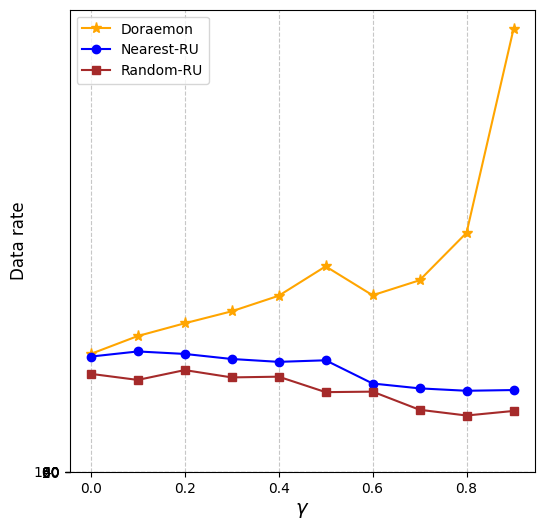

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory containing gamma_* folders
base_path = r".\result\24-02-2025_11-49-21"
gamma_values = [0] + [round(0.1 * i, 1) for i in range(1, 10)]  # Ensure gamma_0 is included
algorithms = ["Doraemon", "Nearest_RU", "Random_RU"]

# Store mean acceptance rates for each algorithm
acceptance_rates = {algo: [] for algo in algorithms}

# Read data from gamma_* folders
for gamma in gamma_values:
    folder_name = f"gamma_{gamma}"  # Example: gamma_0, gamma_0.1, ..., gamma_0.9
    folder_path = os.path.join(base_path, folder_name)

    for algo in algorithms:
        file_path = os.path.join(folder_path, algo, "R_sk.txt")

        if os.path.exists(file_path):
            with open(file_path, "r") as f:
                data = [float(line.strip()) for line in f.readlines() if line.strip()]  # ✅ Skip empty lines
            mean_value = (np.mean(data)) if data else None  # Compute mean and divide by 20
        else:
            print(f"⚠️ File not found: {file_path}")
            mean_value = None  # Assign None if the file is missing

        acceptance_rates[algo].append(mean_value)

# Define markers and colors for the reference image style
plot_styles = {
    "Doraemon": {"marker": "*", "color": "orange", "label": "Doraemon", "size": 8},  # Star marker
    "Nearest_RU": {"marker": "o", "color": "blue", "label": "Nearest-RU", "size": 6},  # Circle marker
    "Random_RU": {"marker": "s", "color": "brown", "label": "Random-RU", "size": 6},  # Square marker
}

# Create the plot
plt.figure(figsize=(6, 6))

for algo in algorithms:
    if any(acceptance_rates[algo]):  # Ensure there's valid data
        plt.plot(gamma_values, acceptance_rates[algo], 
                 marker=plot_styles[algo]["marker"], linestyle="-",
                 color=plot_styles[algo]["color"], markersize=plot_styles[algo]["size"], 
                 label=plot_styles[algo]["label"])

# Labels and title
plt.xlabel(r"$\gamma$", fontsize=14)  # Ký hiệu γ
plt.ylabel("Data rate", fontsize=12)

# Customize y-axis to show specific values
plt.yticks([20, 40, 60, 80, 100])

# Grid and legend
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=10)

# Save as PDF
pdf_path = "data_rate_plot.pdf"
plt.savefig(pdf_path, format="pdf", bbox_inches="tight")
print(f"📄 Plot saved as {pdf_path}")

# Show the plot
plt.show()
